<img src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_su9da4fu/def_height/1001/def_width/1911/version/100011/type/2/q/100"  width="300" height="200">

# Exploratory Data Analysis

Let's create a roadmap for Data Analysis.
- Split our data into train, validate, and test sets
- Plot the distributions of each feature and `logerror`.
    - Formulate Hypotheses
- Plot the interactions each feature and the target variable, `logerror`.
    - Formulate Hypotheses
- Test Hyotheses
- Summary

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from prepare import prepare_zillow
from wrangle import train_validate_test, impute_values

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = prepare_zillow()
train, validate, test = train_validate_test(df)
train, validate, test = impute_values(train, validate, test)

In [3]:
print(train.shape)
train.head()

(31463, 23)


,parcelid,num_of_bedrooms,num_of_restrooms,living_room_area_sqft,lot_size_sqft,year_built,has_basement,has_hottub_or_spa,has_pool,pool_area_sqft,...,basement_area_sqft,property_tax,structure_tax,land_tax,taxable_value,date_sold,fips,latitude,longitude,logerror
50002,17178758,4.0,3.5,2844.0,4500.0,2003,0,0,0,0.0,...,0.0,6273.00,176419.0,328433.0,504852.0,2017-05-09,6111,34211156.0,-119174179.0,0.332771
10254,11294644,2.0,2.0,1282.0,6353.0,1986,0,0,0,0.0,...,0.0,2700.23,124263.0,31065.0,155328.0,2017-03-09,6037,34703819.0,-118119752.0,0.115085
25372,12496674,2.0,1.0,1175.0,4820.0,1950,0,0,0,0.0,...,0.0,5750.83,108385.0,376843.0,485228.0,2017-03-16,6037,33816603.0,-118114331.0,-0.000979
24999,12480422,4.0,3.0,1765.0,5743.0,1943,0,0,0,0.0,...,0.0,4062.59,106907.0,228541.0,335448.0,2017-03-17,6037,33867042.0,-118129712.0,0.011115
36733,13989648,3.0,2.0,1053.0,7200.0,1954,0,0,0,0.0,...,0.0,2650.54,67342.0,143981.0,211323.0,2017-07-11,6059,33822219.0,-117966434.0,0.053176


In [4]:
train.num_of_bedrooms.value_counts()

3.0     14138
4.0      9107
2.0      4965
5.0      2426
6.0       382
1.0       357
7.0        64
8.0        13
9.0         5
10.0        2
12.0        2
11.0        1
14.0        1
Name: num_of_bedrooms, dtype: int64

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,31463.0,1.298828e+07,3.578434e+06,1.071186e+07,1.149657e+07,1.256305e+07,1.412227e+07,1.676870e+08
num_of_bedrooms,31463.0,3.312367e+00,9.356999e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
num_of_restrooms,31463.0,2.306980e+00,1.026015e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
living_room_area_sqft,31463.0,1.928402e+03,1.010015e+03,1.280000e+02,1.270000e+03,1.661000e+03,2.308500e+03,1.865400e+04
lot_size_sqft,31463.0,1.116874e+04,7.645269e+04,5.400000e+02,5.614000e+03,6.878000e+03,8.778000e+03,6.971010e+06
year_built,31463.0,1.963462e+03,2.310621e+01,1.885000e+03,1.950000e+03,1.961000e+03,1.979000e+03,2.016000e+03
has_basement,31463.0,9.217176e-04,3.034629e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_hottub_or_spa,31463.0,3.032133e-02,1.714727e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_pool,31463.0,2.116136e-01,4.084588e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pool_area_sqft,31463.0,8.778216e+00,7.006624e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03


# Distributions of each feature

Let's check out the distributions of each feature.
1. Distributions of Geography Features
2. Distributions of Home Features
3. Distributions of Tax Features

In [6]:
geo_features = ['fips', 'latitude', 'longitude', 'logerror']


home_features = ['parcelid',
                 'num_of_bedrooms',
                 'num_of_restrooms',
                 'living_room_area_sqft',
                 'lot_size_sqft',
                 'year_built',
                 'has_basement',
                 'has_hottub_or_spa',
                 'has_pool',
                 'pool_area_sqft',
                 'has_patio',
                 'patio_area_sqft',
                 'has_shed',
                 'basement_area_sqft',
                 'logerror']

tax_features = ['property_tax',
                'structure_tax',
                'land_tax',
                'taxable_value',
                'logerror']

In [7]:
distributions = train.copy()

# drop the date column for now
distributions.drop(columns='date_sold', inplace=True)

## Distributions of Geography features
Let's start with a birds eye view of our data:<br>
latitude, longitutde, fips, logerror

In [8]:
# filter our dataset for geographic features
geo_dists = distributions[geo_features].copy()

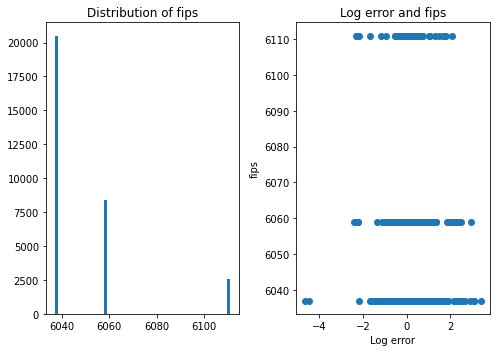

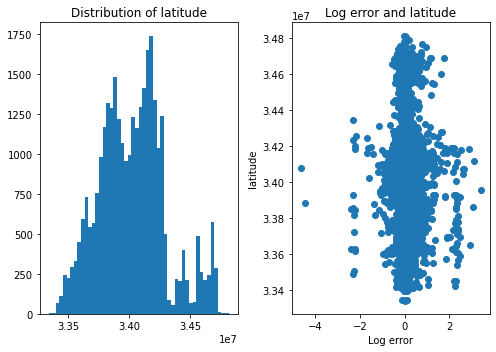

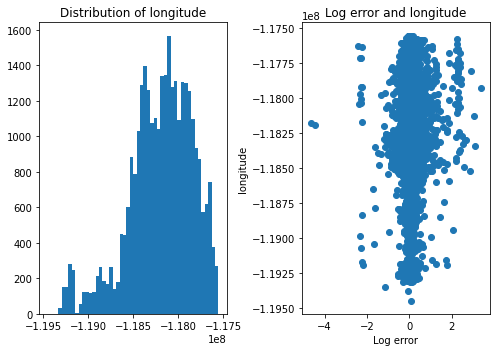

In [9]:
for i in geo_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(geo_dists[i], bins=50)
    ax2.scatter(geo_dists.logerror, geo_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Geography Features
- Fips 6037 contains the most properties in the dataset followed by fips 6059, and fips 6111.
- The largest logerrors occur in fips 6037 - Los Angeles
- We'll plot the longitude and latitude features later
- fips represents the county a property is located in. We'll take a look at the interaction between `fips` and home features later to determine if any relationship exists.
---
## Distributions of Home Features

Let's take a look at our properties

In [10]:
home_dists = distributions[home_features].copy()

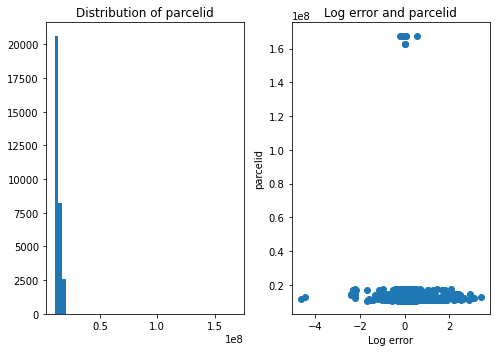

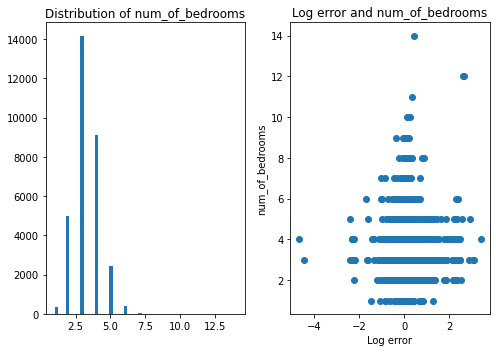

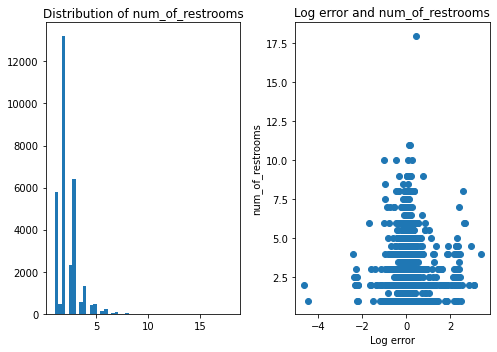

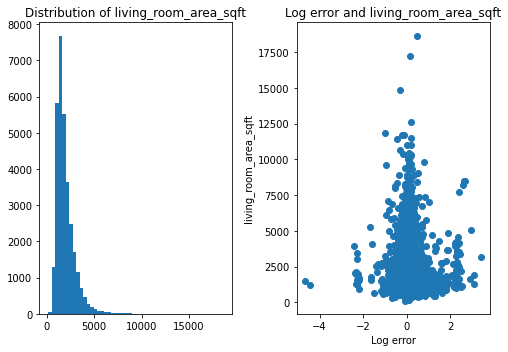

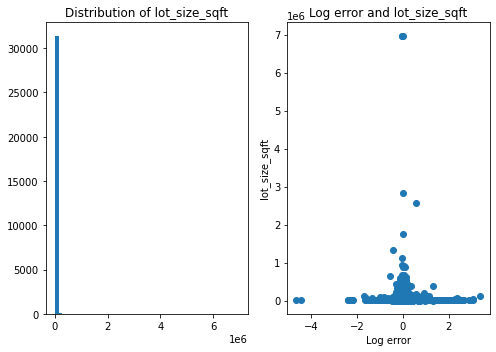

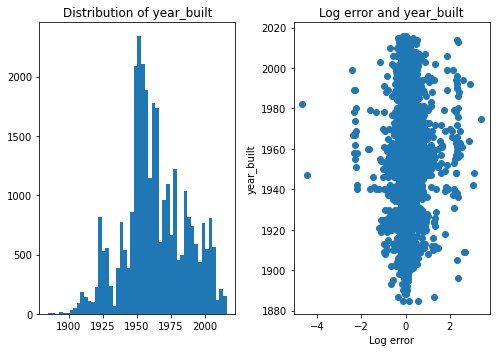

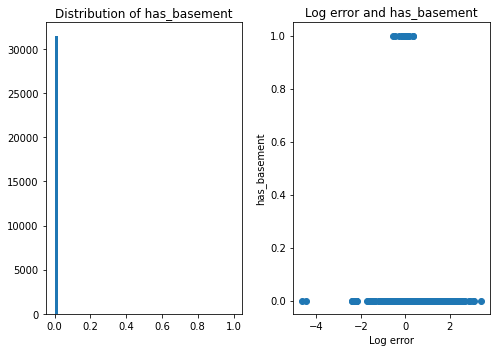

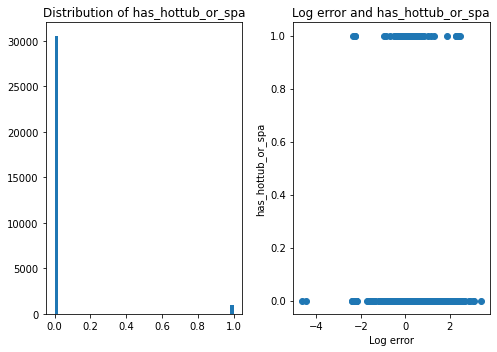

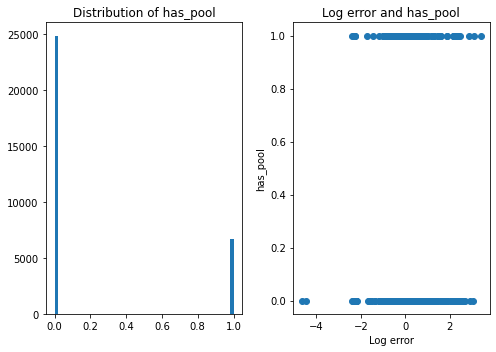

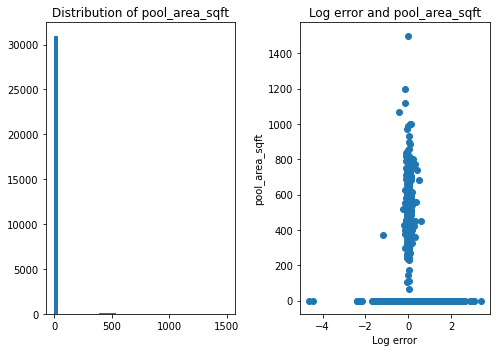

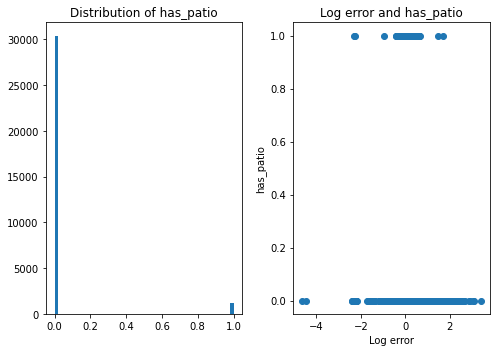

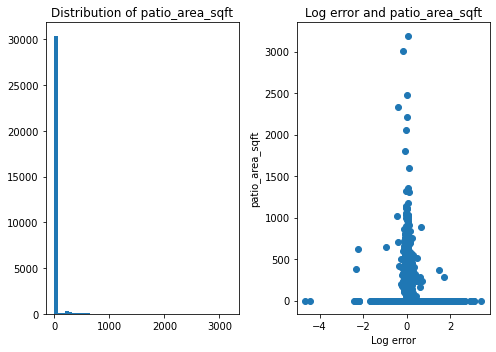

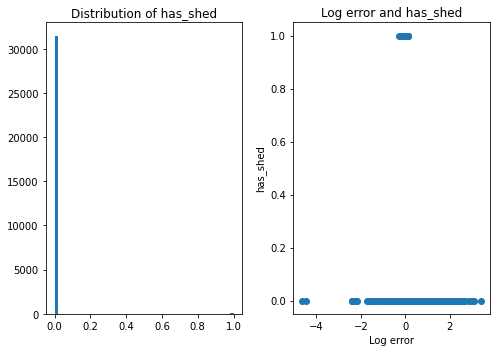

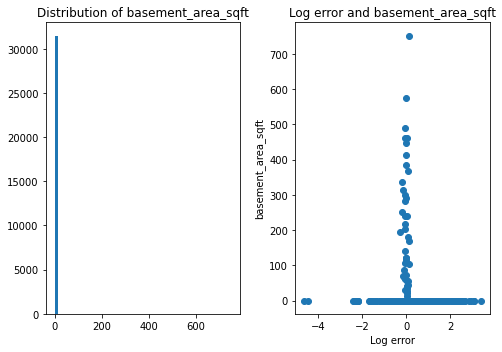

In [11]:
for i in home_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(home_dists[i], bins=50)
    ax2.scatter(home_dists.logerror, home_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Home Features

## Distributions of Tax Features

In [12]:
tax_dists = distributions[tax_features].copy()

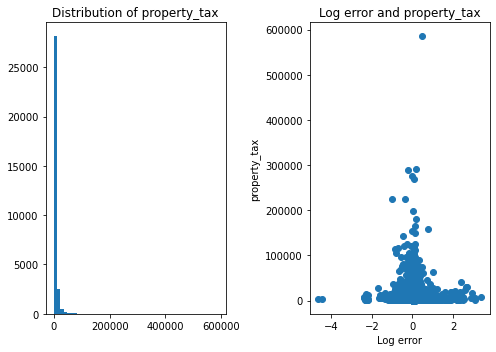

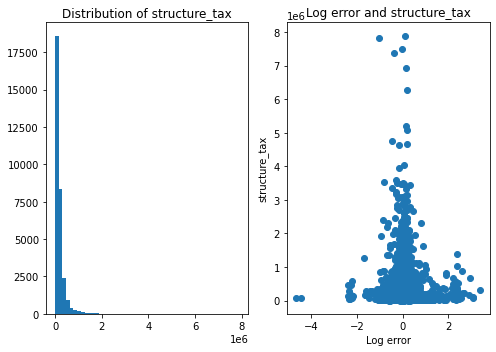

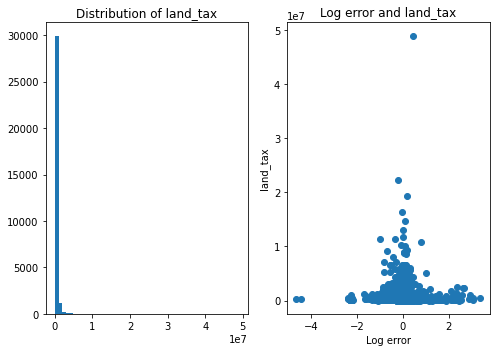

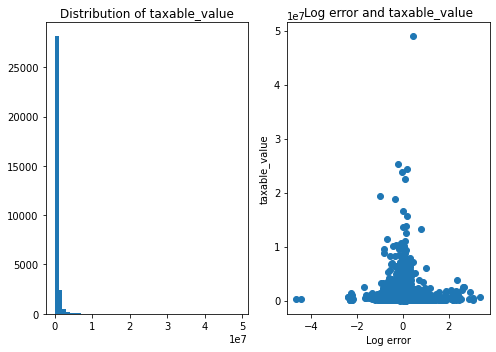

In [13]:
for i in tax_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(tax_dists[i], bins=50)
    ax2.scatter(tax_dists.logerror, tax_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Home Features

---
# Interactions between features and `logerror`

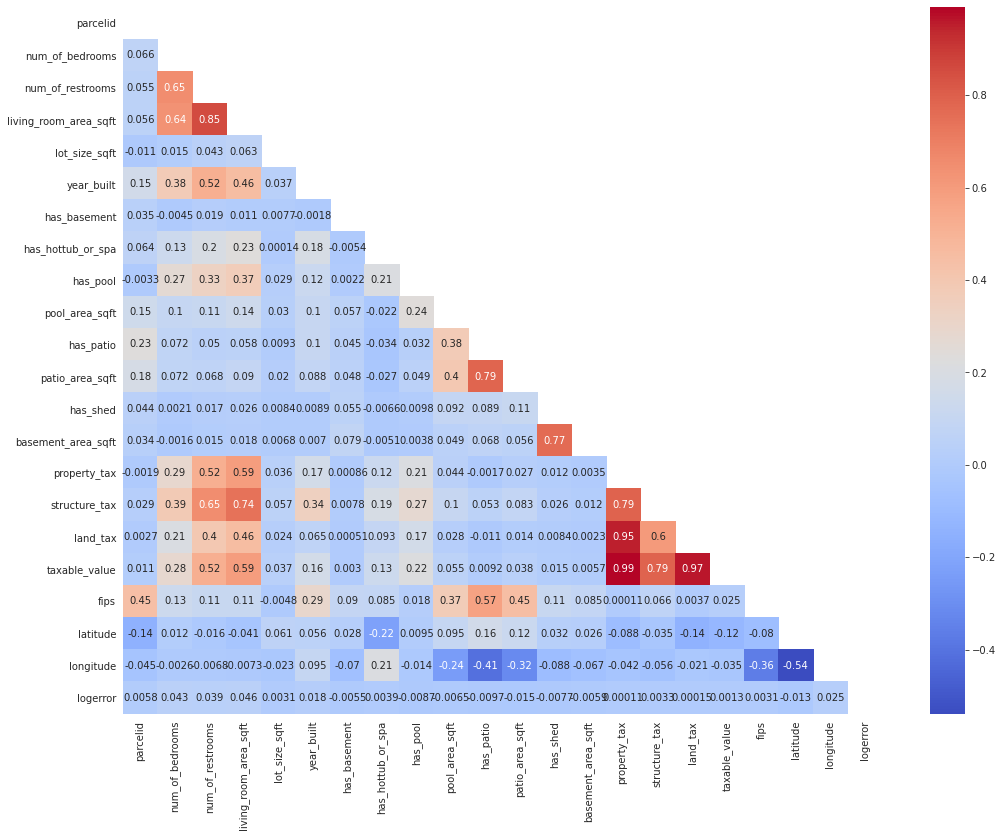

In [14]:
correlations = train.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(17, 13))
    ax = sns.heatmap(correlations,
                     mask=mask,
                     annot=True,
                     fmt='.2',
                     cmap='coolwarm'
                    )   

In [15]:
correlations[['logerror']].sort_values(by='logerror', ascending=False)[1:]

,logerror
living_room_area_sqft,0.045942
num_of_bedrooms,0.043156
num_of_restrooms,0.039200
longitude,0.024600
year_built,0.018020
parcelid,0.005807
has_hottub_or_spa,0.003919
structure_tax,0.003304
lot_size_sqft,0.003082
fips,0.003063


In [45]:
train['absolute_logerror'] = abs(train.logerror)

In [57]:
train['binned_error'] = pd.cut(train.absolute_logerror, 4, labels=[1, 2, 3, 4])

In [59]:
df_log_error_binned = train[train.binned_error >=2].copy()

In [81]:
df_log_error_binned.binned_error.count()

128

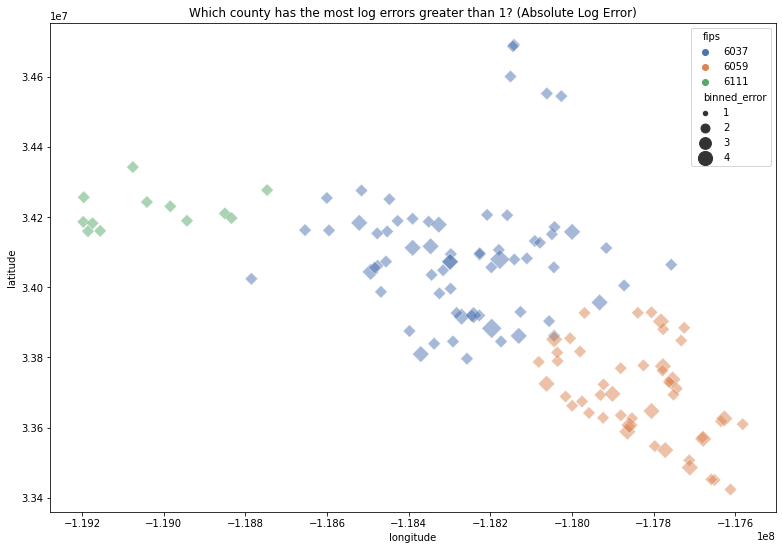

In [79]:
plt.figure(figsize=(13, 9))
sns.scatterplot(df_log_error_binned.longitude,
                df_log_error_binned.latitude,
                hue=df_log_error_binned.fips,
                size=df_log_error_binned.binned_error,
                palette='deep',
                marker='D',
                sizes=(200, 20),
                alpha=.5
               )
plt.title('Which county has the most log errors greater than 1? (Absolute Log Error)')
plt.show()

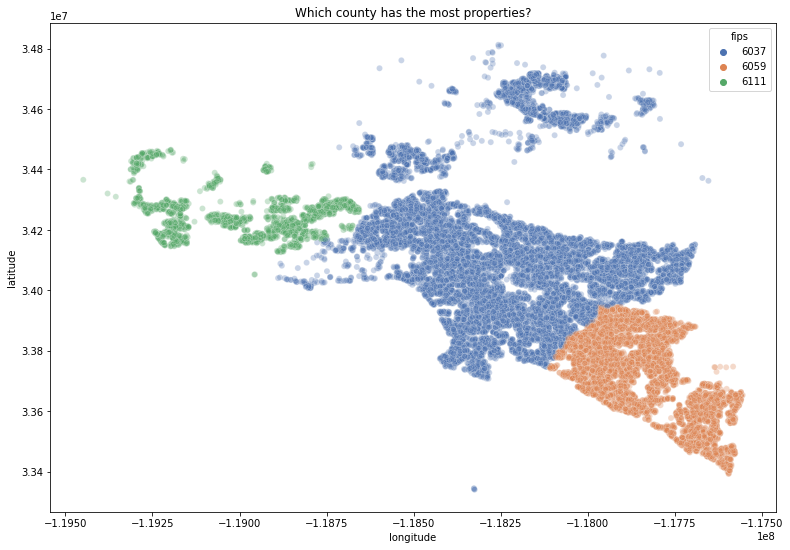

In [80]:
plt.figure(figsize=(13, 9))
sns.scatterplot(train.longitude,
                train.latitude,
                hue=train.fips,
                palette='deep',
                alpha=.3
               )
plt.title('Which county has the most properties?')
plt.show()

# Hypothesis Tests

- Is the logerror significantly different between counties?
- Is the logerror significantly different for homes with pools than those without?
- Is the logerror significantly different for homes with sheds than those without?
- Is the logerror significantly different for homes with patios than those without?
- Is the logerror significantly different for homes with a spa or hottub than those without?
- Is the property tax value significantly greater in los angeles than the other counties?
- Is the logerror significantly greater than the average for homes with more than x restrooms than those with less than x restrooms?
- Is the logerror significantly greater than the average for homes with more than x bedrooms than those with less than x bedrooms?

> Test for independence

In [18]:
confidence_interval = 0.95
alpha = 1 - confidence_interval

In [19]:
#:O
f, p = stats.f_oneway(train[train.fips==6111].logerror,
                      train[train.fips==6037].logerror,
                      train[train.fips==6059].logerror
                     )
print(f, p)

8.965399768786941 0.0001280812410341408


In [20]:
t, p = stats.ttest_ind(train[train.has_pool==1].logerror, train[train.has_pool==0].logerror)
print(t, p)

-1.5494151244618113 0.1212920188940172


In [21]:
t, p = stats.ttest_ind(train[train.has_shed==1].logerror, train[train.has_shed==0].logerror)
print(t, p)

-1.3664639250348976 0.17180316200380907


In [22]:
traint, p = stats.ttest_ind(train[train.has_patio==1].logerror, train[train.has_patio==0].logerror)
print(t, p)

-1.3664639250348976 0.08425752373341996


In [23]:
t, p = stats.ttest_ind(train[train.has_hottub_or_spa==1].logerror, train[train.has_hottub_or_spa==0].logerror)
print(t, p)

0.6950597817413485 0.48702297101252356


In [24]:
t, p = stats.ttest_ind(train[train.has_basement==1].logerror, train[train.has_basement==0].logerror)
print(t, p)

-0.9695804969495023 0.3322630918922421


In [25]:
# :O
t, p = stats.ttest_ind(train[train.fips==6037].logerror, train[train.fips!=6037].logerror)
print(t, p)

-3.045302974208775 0.002326382307810839


In [26]:
# :O
# Chi2 dependent
pools_and_fips = pd.crosstab(train.has_pool, train.fips)
chi2, p, dof, ex = stats.chi2_contingency(pools_and_fips)
print(chi2, p)

48.35491418190293 3.161286079492081e-11


In [29]:
# :O
t, p = stats.ttest_ind(train[train.num_of_bedrooms > 5].logerror,
                       train[train.num_of_bedrooms <= 5].logerror
                      )
print(t, p)

4.625738637035254 3.747508645434888e-06


In [30]:
# :O
t, p = stats.ttest_ind(train[train.num_of_restrooms > 5].logerror,
                       train[train.num_of_restrooms <= 5].logerror
                      )
print(t, p)

4.563019101318878 5.061360213842951e-06


## Summary of Hypothesis Testing
- 1
- 1
- 1

On to modeling :)

# Appendix

In [31]:
# Categorical values
categorical_features = df.nunique()[df.nunique() < 22].index.to_list()
numerical_features = df.drop(columns=categorical_features).columns.to_list()

In [32]:
df_categorical_features = df[categorical_features]
df_numerical_features = df[numerical_features]

```python
for i in distributions.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(distributions[i], bins=50)
    ax2.scatter(distributions.logerror, distributions[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()
```

[zillow-zestimate](https://www.zillow.com/zestimate/)

Notes:
`The Zestimate® home valuation model is Zillow’s estimate of a home's market value. The Zestimate incorporates public and user-submitted data, taking into account home facts, location and market conditions.`

`It is not an appraisal and it should be used as a starting point. We encourage buyers, sellers and homeowners to supplement the Zestimate with other research such as visiting the home, getting a professional appraisal of the home, or requesting a comparative market analysis (CMA) from a real estate agent.`

`The amount of data we have for your home and homes in your area directly affects the Zestimate's accuracy. If the data is incorrect or incomplete, update your home facts — this may affect your Zestimate.`    
    
`The Zestimate was created to give consumers more information about homes and the housing market. It is intended to provide user-friendly data to promote transparent real estate markets and allow people to make more informed decisions — it should not be used to drive up the price of a home. Zestimates are designed to track the market, not drive it.`
    
`The Zestimate is not an appraisal and can't be used in place of an appraisal. It is a computer-generated estimate of the value of a home today, given the available data.`

`Note: The Zestimate's accuracy is computed by comparing the final sale price to the Zestimate that was published on or just prior to the sale date.`

`Median Error:
    The nationwide median error rate for the Zestimate for on-market homes is 1.9%, while the Zestimate for off-market homes has a median error rate of 7.5%. This means that the Zestimates for half of all on-market homes are within 2% of the selling price, and half are not. For most major markets, the Zestimate for on-market homes is within 10% of the final sale price more than 95% of the time.`